<a href="https://colab.research.google.com/github/AliKarimiENT/CSP-ArtificialIntelligence-UT/blob/main/Hamshahri_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install libraries 

In [2]:
!pip install nltk
!pip install hazm
!pip install stopwords_guilannlp
!pip install -U -q PyDrive
!pip install tensorflow
!pip install -U numpy==1.21

!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 4.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 2.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data from dataset

In [4]:
corpus_path = '/content/drive/MyDrive/University Tehran /Hamshahri-Corpus.txt'
data = []
category = ''
categories = []
desc = ''
category_id = 0
with open(corpus_path,'r') as f:
  lines = f.readlines()
  for line in lines:
    if line is not '\n':
      if ".DID" in line:
        if category is not '' and desc is not '':
            data.append([desc,category,category_id])
        category = ''
        desc = ''
      elif ".Cat" in line :
        category = line.split()[1]
        if category not in categories :
            categories.append(category)
        category_id = categories.index(category)
      elif ".Date" not in line:
        desc = desc + line.strip('\n')



In [5]:
import csv

header = ['Text','Category','Category ID']
with open('/content/train.csv','w',encoding = 'UTF8',newline='') as file:
  writer = csv.writer(file)

  # write the header
  writer.writerow(header)

  # write the data
  writer.writerows(data)


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow

# Preprocessing
from hazm import *

In [7]:
df = pd.read_csv('/content/train.csv', encoding='utf-8')[0:13000]
df

,Text,Category,Category ID
0,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...,adabh,0
1,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...,adabh,0
2,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...,adabh,0
3,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...,ejtem,1
4,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...,elmfa,2
...,...,...,...
12995,خبرهاي تازه از فوتبال انگليس رايت ماندني شد، ك...,vrzsh,10
12996,عصاي كارگشا در پارك لاله نمايش عصا، عصاي كارگ...,adabh,0
12997,جهان پهلوان ناتمام ماند و او خود تمام شد عزت ...,adabh,0
12998,نمايش فراموش شده ولاديمير ناباكف در بيست وسوم ...,adabh,0


Use seaborn library and countplot function to show volume of items for each category

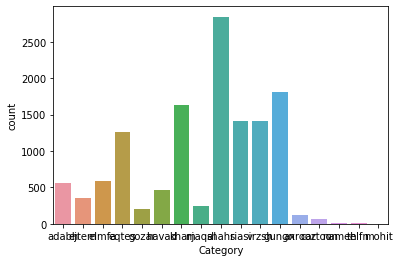

In [8]:
sns.countplot(x=df["Category"])
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()

In [9]:
# X is data that we set for train
X = df["Text"]

# Y is the label that we get from that
Y = df["Category"]

Encode label

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# convert categories to integers
Y = le.fit_transform(Y)
print(Y)

[0 0 0 ... 0 0 1]


Devide dataset to train and test parts

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


Tokenize text

In [12]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500
tkn = Tokenizer(max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)
print(seq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The length of inputs must be equal

Use padding to set lengthes equaly 100



In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
# because we set padding = pre it added zeros before the word indexs
padded_docs = pad_sequences(seq,padding = 'pre',maxlen = max_len)
print(padded_docs)

[[  0   0   0 ... 399  15   8]
 [465  24   1 ...  26 435  95]
 [ 45   6 160 ...  43 262 128]
 ...
 [321  62 127 ... 369  37  19]
 [  0   0   0 ...   1   3   8]
 [  9   3 329 ... 371 154  16]]


Generate sequential model

> Use LSTM for classification



In [15]:
from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense,Input,Embedding

# number of features that we select for embeddings
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words,embedding_vector_features,input_length=max_len))

#Long Short Term Memory
model.add(LSTM(256)) 
# 256 means number of memory units

# add Dense to get classification output
# Dense layer is 1 dimentional
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics =['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309,145
Trainable params: 309,145
Non-trainable params: 0
_________________________________________________________________
None


# Read Dataset

In [ ]:
sentence_train = train_data['Text']
label_train = train_data['Category ID']

print('Number of training sentence: ', sentence_train.shape)
print('Number of training label: ', label_train.shape)


Number of training sentence:  (13000,)
Number of training label:  (13000,)


In [ ]:
from collections import Counter
cnt = Counter(label_train)
cnt = dict(cnt)
print(cnt)

{0: 557, 1: 354, 2: 583, 3: 1265, 4: 209, 5: 465, 6: 1629, 7: 250, 8: 2846, 9: 1409, 10: 1410, 11: 1813, 12: 126, 13: 64, 14: 10, 15: 7, 16: 3}


In [ ]:
# Convert dataframes to numpy arrays
sentence_train = np.asarray(sentence_train)
label_train = np.asarray(label_train)

In [ ]:
# Prepare labels for categorical prediction
categorical_label_train = to_categorical(label_train, 105)
categorical_label_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Preprocessing

In [50]:
import re
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
# turn a doc into clean tokens
def clean_data(doc):
    doc = normalizer.normalize(doc) # Normalize document using Hazm Normalizer
    tokenized = word_tokenize(doc)  # Tokenize text
    tokens = []
    for token in tokenized:
      token = re.sub("[،:.,;()/+]", " ", token) 
      token = re.sub(r"\!+","!", token)
      token = re.sub(r"\؟+","؟", token)
      token = re.sub(r"\u200c", " ", token)
      tokens.append(token)

    tokens = [w for w in tokens if not len(w) <= 1] # single character removal 
    tokens = [w for w in tokens if not w.isdigit()] # digit remove
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatize sentence words using Hazm Lemmatizer
    tokens = [stemmer.stem(w) for w in tokens] 
    tokens = ' '.join(tokens)
    return tokens

# Apply preprocessing to dataset

In [ ]:
# Apply preprocessing step to training data
train_docs = np.empty_like(sentence_train)
for index, document in enumerate(sentence_train):
  train_docs[index] = clean_data(document)

In [ ]:
num_words = 2000

# Create the tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)
print(encoded_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Find maximum length of training sentences
max_length = max([len(s.split()) for s in train_docs])
max_length

3053

### Padding 

In [ ]:
# Pad embeded training sequences
x_train_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
x_train_padded[1]

array([1263,  243,   73, ...,    0,    0,    0], dtype=int32)

In [ ]:
#vocabulary size
vocab_size = len(tokenizer.word_index)

In [ ]:
import random
valid_set = pd.read_csv('/content/train.csv', encoding='utf-8')[13000:14480]
valid_set

,Text,Category,Category ID
13000,كسانيكه به قله رسيده اند! رسيدن به قله سعادت ب...,ejtem,1
13001,از سوي وزارت آموزش و پرورش اعلام شد: شرايط شرك...,elmfa,2
13002,از 18 تا 20 اسفند در تهران و همدان كنگره بين ا...,elmfa,2
13003,فعاليت گسترده وزارت كار براي معرفي بيكاران به ...,eqtes,3
13004,افزايش قيمت برق در بخش كشاورزي توسعه شبكه آبيا...,eqtes,3
...,...,...,...
14475,انتخاب رشته، خاكريز اول كنكور خانواده ها، دان...,gozar,4
14476,بليت هاي ويژه دست اندركاران سينما . سرويس ادب ...,gungn,11
14477,گشتي در دنياي خبرها كامپيوترهاي از رده خارج 4 ...,gungn,11
14478,گل و گياه اركيده گل بنفشه اي (ميلتونيا ). نام ...,gungn,11


In [ ]:
sentence_valid = np.asarray(valid_set['Text'])
label_valid = np.asarray(valid_set['Category ID'])

In [ ]:
categorical_label_valid = to_categorical(label_valid, 105)
categorical_label_valid

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Apply preprocessing step to valid data
valid_docs = np.empty_like(sentence_valid)
for index, document in enumerate(sentence_valid):
  valid_docs[index] = clean_data(document)

In [ ]:
# Embed valid sequences
encoded_docs1 = tokenizer.texts_to_sequences(valid_docs)
x_valid_padded = pad_sequences(encoded_docs1, maxlen=max_length, padding='post')

In [ ]:
model_blstm = Sequential()
n_timesteps = 10

model_blstm.add(Embedding(vocab_size, 100, input_length=max_length))
model_blstm.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))

model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.25))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.2))
model_blstm.add(Dense(8, activation='softmax'))

NotImplementedError: ignored